In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
METRICS_ORDER = ["kl", "hd", "jsd", "acc", "ace", "spa", "mse"]

METRIC_NAMES = {
    "kl": "KL",
    "hd": "HD",
    "jsd": "JSD",
    "acc": "Acc.",
    "ace": "ACE",
    "spa": "SPA",
    "mse": "MSE",
}

In [3]:
import pandas as pd
import numpy as np

summary = pd.read_csv("../../analysis/synthetic/results/summary_mean_std.csv", header=[0, 1])

# MultiIndex を flatten
summary.columns = [
    c[0] if c[1] == '' or c[1].startswith('Unnamed') else f"{c[0]}_{c[1]}"
    for c in summary.columns
]


In [4]:
LOWER_IS_BETTER = {"kl", "hd", "jsd", "ace", "mse"}

def format_mean_std(df, metric):
    mean = df[f"{metric}_mean"]
    std = df[f"{metric}_std"]

    if metric in LOWER_IS_BETTER:
        order = mean.argsort()
    else:
        order = (-mean).argsort()

    best, second = order.iloc[0], order.iloc[1]

    out = []
    for i in range(len(df)):
        s = f"{mean.iloc[i]:.2f} ± {std.iloc[i]:.2f}"
        if i == best:
            s = f"\\textbf{{{s}}}"
        elif i == second:
            s = f"\\underline{{{s}}}"
        out.append(s)
    return out


In [5]:
table1 = pd.DataFrame()
table1["Method"] = summary["method"]

for m in METRICS_ORDER:
    table1[METRIC_NAMES[m]] = format_mean_std(summary, m)

table1


,Method,KL,HD,JSD,Acc.,ACE,SPA,MSE
0,full_information,\textbf{2.72 ± 2.65},\textbf{2.27 ± 1.65},\textbf{0.70 ± 0.69},\textbf{0.86 ± 0.09},\textbf{0.34 ± 0.22},\textbf{0.84 ± 0.07},\textbf{0.05 ± 0.03}
1,popularity,4.54 ± 6.91,2.60 ± 1.84,0.91 ± 0.86,\underline{0.84 ± 0.09},0.42 ± 0.37,0.82 ± 0.07,0.05 ± 0.03
2,proposed,\underline{2.85 ± 2.68},\underline{2.32 ± 1.66},\underline{0.73 ± 0.70},0.84 ± 0.10,\underline{0.36 ± 0.23},\underline{0.83 ± 0.07},\underline{0.05 ± 0.03}
3,random,5.72 ± 5.03,3.21 ± 2.15,1.34 ± 1.16,0.72 ± 0.15,0.45 ± 0.30,0.78 ± 0.09,0.07 ± 0.04
4,simple_markov,31.17 ± 20.88,3.27 ± 2.02,1.31 ± 0.96,0.79 ± 0.13,1.37 ± 1.02,0.81 ± 0.09,0.07 ± 0.04


In [6]:
print(table1.to_latex(escape=False, index=False))

\begin{tabular}{llllllll}
\toprule
Method & KL & HD & JSD & Acc. & ACE & SPA & MSE \\
\midrule
full_information & \textbf{2.72 ± 2.65} & \textbf{2.27 ± 1.65} & \textbf{0.70 ± 0.69} & \textbf{0.86 ± 0.09} & \textbf{0.34 ± 0.22} & \textbf{0.84 ± 0.07} & \textbf{0.05 ± 0.03} \\
popularity & 4.54 ± 6.91 & 2.60 ± 1.84 & 0.91 ± 0.86 & \underline{0.84 ± 0.09} & 0.42 ± 0.37 & 0.82 ± 0.07 & 0.05 ± 0.03 \\
proposed & \underline{2.85 ± 2.68} & \underline{2.32 ± 1.66} & \underline{0.73 ± 0.70} & 0.84 ± 0.10 & \underline{0.36 ± 0.23} & \underline{0.83 ± 0.07} & \underline{0.05 ± 0.03} \\
random & 5.72 ± 5.03 & 3.21 ± 2.15 & 1.34 ± 1.16 & 0.72 ± 0.15 & 0.45 ± 0.30 & 0.78 ± 0.09 & 0.07 ± 0.04 \\
simple_markov & 31.17 ± 20.88 & 3.27 ± 2.02 & 1.31 ± 0.96 & 0.79 ± 0.13 & 1.37 ± 1.02 & 0.81 ± 0.09 & 0.07 ± 0.04 \\
\bottomrule
\end{tabular}



In [7]:
ratio = pd.read_csv("../../analysis/synthetic/results/significant_ratio.csv")

ratio["percent"] = 100 * ratio["significant_ratio"]

In [8]:
BASELINE_ORDER = [
    "full_information",
    "popularity",
    "random",
    "simple_markov",
]

table2 = pd.DataFrame()
table2["vs. Method"] = [f"vs. {b}" for b in BASELINE_ORDER]

for m in METRICS_ORDER:
    vals = []
    for b in BASELINE_ORDER:
        v = ratio[
            (ratio["metric"] == m) &
            (ratio["baseline"] == b)
        ]["percent"].values

        vals.append(f"{v[0]:.1f}" if len(v) > 0 else "-")

    table2[METRIC_NAMES[m]] = vals

table2

,vs. Method,KL,HD,JSD,Acc.,ACE,SPA,MSE
0,vs. full_information,15.3,15.5,15.7,1.0,1.0,1.7,1.2
1,vs. popularity,70.2,72.2,70.5,0.7,42.9,63.7,35.8
2,vs. random,99.8,99.8,100.0,98.8,88.6,99.5,89.1
3,vs. simple_markov,100.0,84.7,82.6,73.4,97.6,48.7,92.7


In [9]:
print(table2.to_latex(index=False))

\begin{tabular}{llllllll}
\toprule
vs. Method & KL & HD & JSD & Acc. & ACE & SPA & MSE \\
\midrule
vs. full_information & 15.3 & 15.5 & 15.7 & 1.0 & 1.0 & 1.7 & 1.2 \\
vs. popularity & 70.2 & 72.2 & 70.5 & 0.7 & 42.9 & 63.7 & 35.8 \\
vs. random & 99.8 & 99.8 & 100.0 & 98.8 & 88.6 & 99.5 & 89.1 \\
vs. simple_markov & 100.0 & 84.7 & 82.6 & 73.4 & 97.6 & 48.7 & 92.7 \\
\bottomrule
\end{tabular}



In [10]:
def plot_significant_ratio(ratio, metric):
    df = ratio[ratio["metric"] == metric]
    pivot = df.pivot(
        index="baseline",
        columns="metric",
        values="significant_ratio"
    )

    plt.figure(figsize=(4, 4))
    sns.heatmap(
        pivot,
        annot=True,
        cmap="Reds",
        vmin=0,
        vmax=1,
        cbar=True
    )
    plt.title(f"Significant Ratio ({metric})")
    plt.tight_layout()
    plt.show()

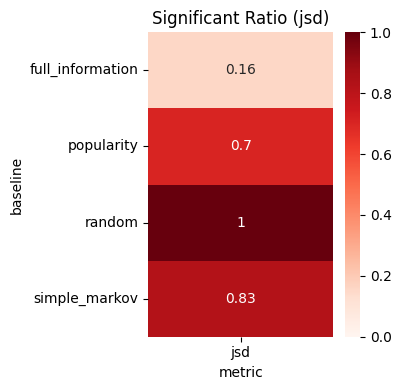

In [11]:
plot_significant_ratio(ratio, "jsd")

In [12]:
import glob
import os

# すべての結果CSVファイルを読み込んで結合
result_files = glob.glob("../outputs/synthetic/results/*.csv")
df_list = []
for file in result_files:
    df = pd.read_csv(file)
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)

ValueError: No objects to concatenate

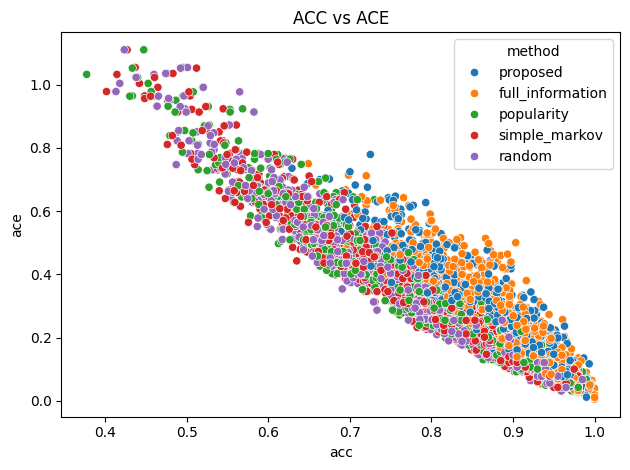

In [ ]:
sns.scatterplot(
    data=df_all,
    x="acc",
    y="ace",
    hue="method"
)
plt.title("ACC vs ACE")
plt.tight_layout()
plt.show()